# Indian Patent Dataset Research and Policy Analysis
This notebook provides insights for research, policy-making, and business intelligence using the Indian Patent Dataset for the years 2010, 2011, and 2019.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Load the datasets
df_2010 = pd.read_csv('data/2010.csv')
df_2011 = pd.read_csv('data/2011.csv')
df_2019 = pd.read_csv('data/2019.csv')

# Combine the datasets
df_2010['Year'] = 2010
df_2011['Year'] = 2011
df_2019['Year'] = 2019
df_all = pd.concat([df_2010, df_2011, df_2019])

# Basic preprocessing
df_all['Application Date'] = pd.to_datetime(df_all['Application Date'], errors='coerce')
df_all['Filing Month'] = df_all['Application Date'].dt.month
df_all['Filing Year'] = df_all['Application Date'].dt.year

## The Impact of Patents in Different Fields of Invention

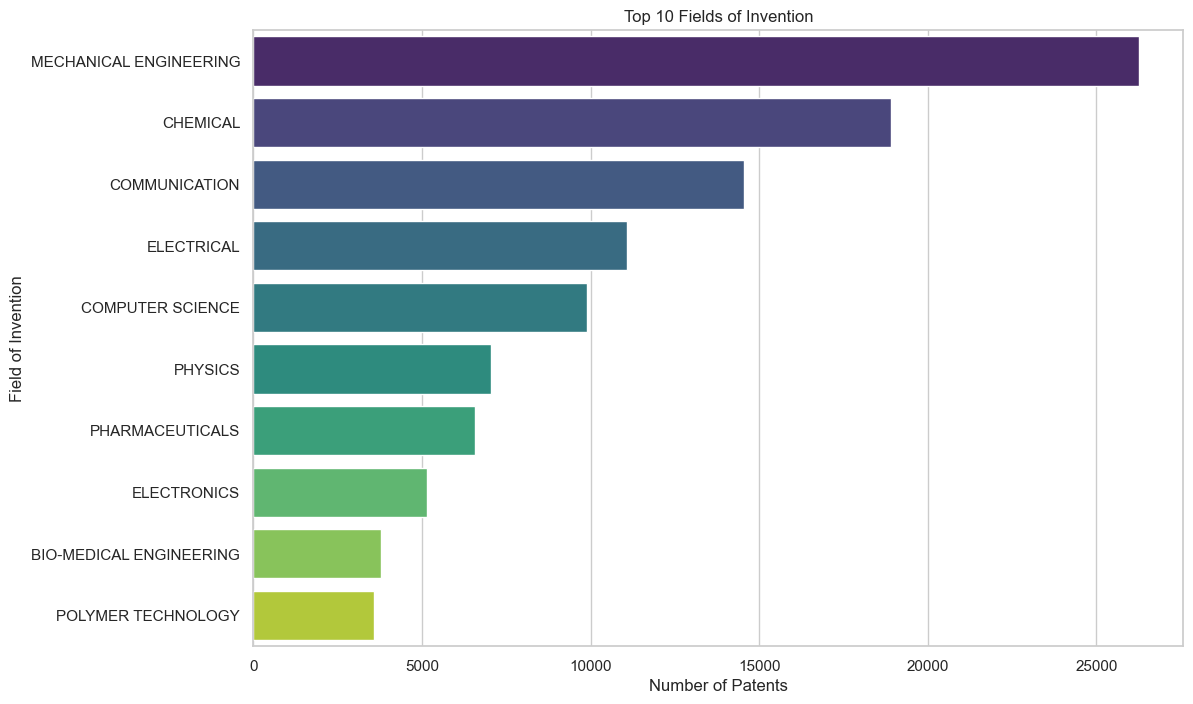

In [5]:
# Top fields of invention
top_fields = df_all['Field Of Invention'].value_counts().head(10)

plt.figure(figsize=(12, 8))
sns.barplot(y=top_fields.index, x=top_fields.values, palette='viridis')
plt.title('Top 10 Fields of Invention')
plt.xlabel('Number of Patents')
plt.ylabel('Field of Invention')
plt.show()

## Trends in Patent Filings by Various Companies or Individuals

## Time Taken from Application to Approval

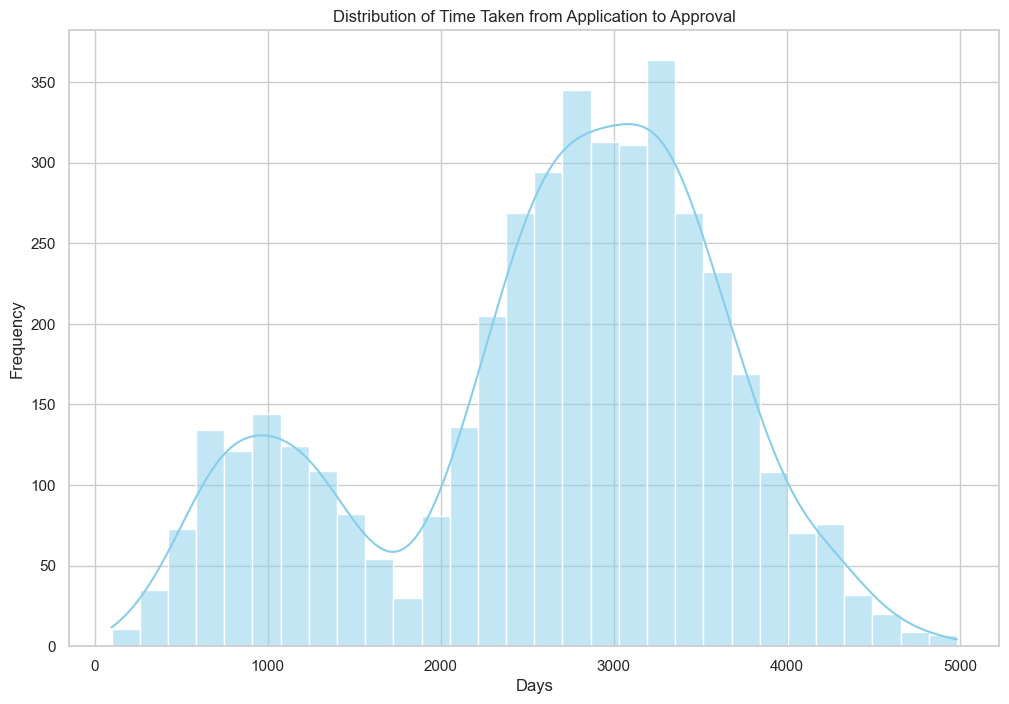

In [6]:
df_all['Date Of Certificate Issue'] = pd.to_datetime(df_all['Date Of Certificate Issue'], errors='coerce')
df_all['Time To Approval'] = (df_all['Date Of Certificate Issue'] - df_all['Application Date']).dt.days

time_to_approval = df_all['Time To Approval'].dropna()

plt.figure(figsize=(12, 8))
sns.histplot(time_to_approval, kde=True, color='skyblue', bins=30)
plt.title('Distribution of Time Taken from Application to Approval')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()

## Gaps and Opportunities in the Patent Landscape

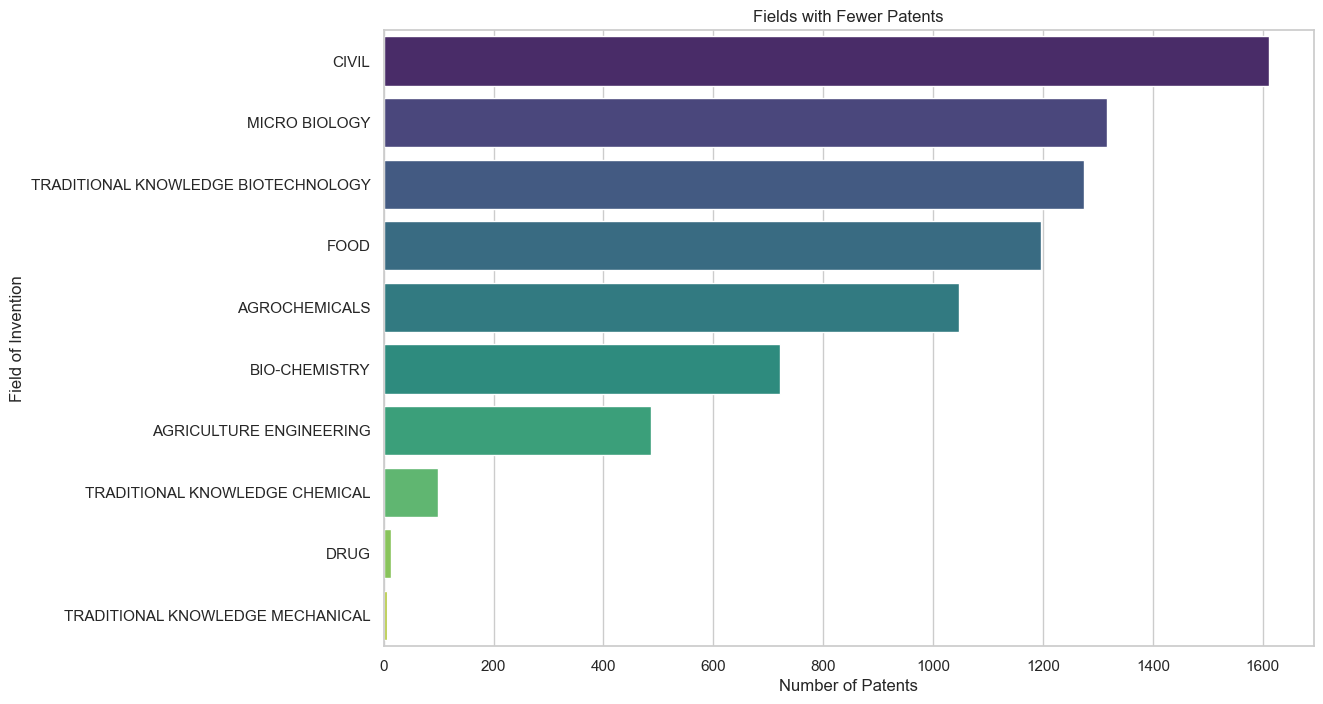

In [10]:
bottom_fields = df_all['Field Of Invention'].value_counts().tail(10)

plt.figure(figsize=(12, 8))
sns.barplot(y=bottom_fields.index, x=bottom_fields.values, palette='viridis')
plt.title('Fields with Fewer Patents')
plt.xlabel('Number of Patents')
plt.ylabel('Field of Invention')
plt.show()

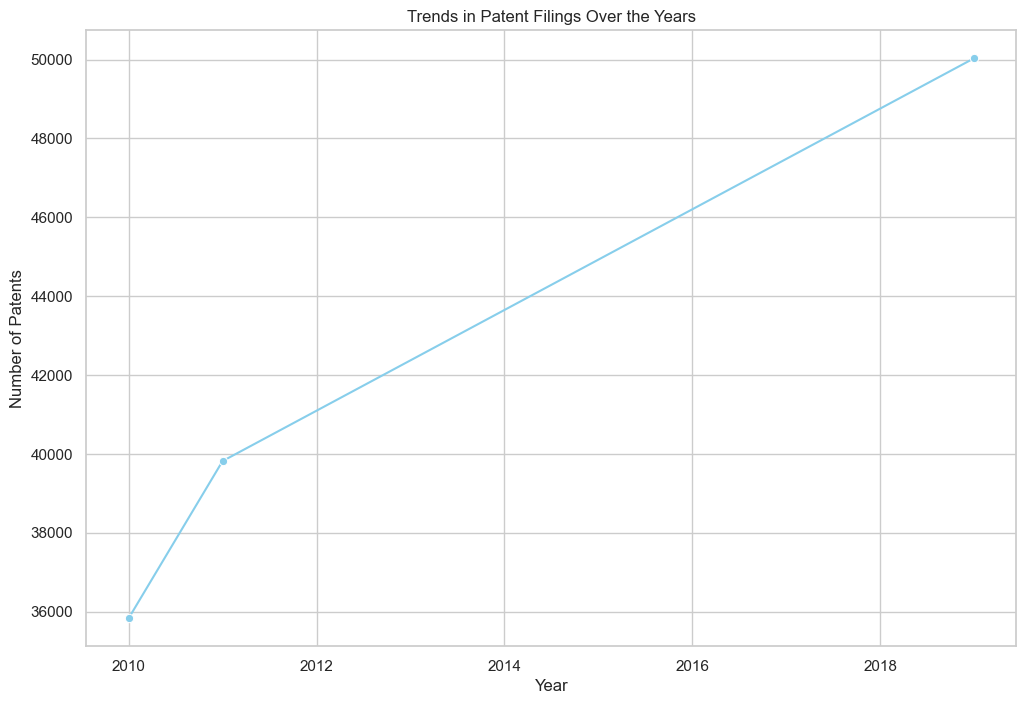

In [11]:
# trends in patent filings over the years
yearly_trends = df_all.groupby('Year').size()

plt.figure(figsize=(12, 8))
sns.lineplot(x=yearly_trends.index, y=yearly_trends.values, marker='o', color='skyblue')
plt.title('Trends in Patent Filings Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Patents')
plt.show()

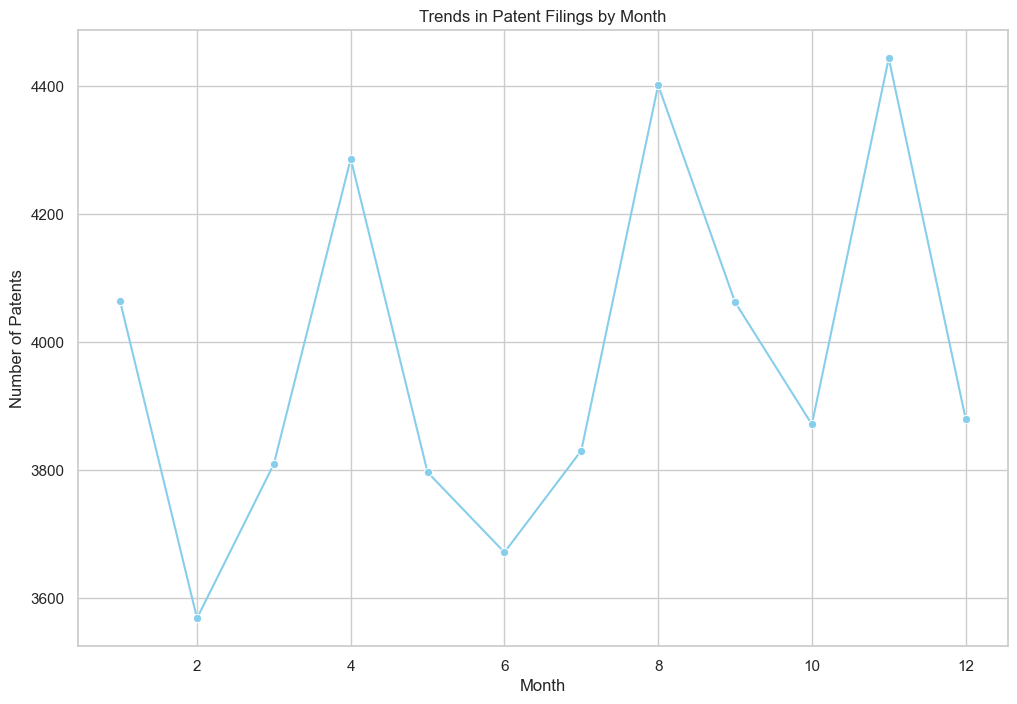

In [13]:
# Trends in patent filings by month
monthly_trends = df_all.groupby('Filing Month').size()

plt.figure(figsize=(12, 8))
sns.lineplot(x=monthly_trends.index, y=monthly_trends.values, marker='o', color='skyblue')
plt.title('Trends in Patent Filings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Patents')
plt.show()